# World Publication (EDA)





## Steps for EDA:


1.   Import Libraries
2.   Load data (df=pd.read_csv('file.csv'))
3.   Data understanding/Knowing
    
    3.1. df.shape

    3.2. df.head(10), df.tail(), df.sample(10)

    3.3. df.info() --> dtype, null

    3.4. df.describe() --> statistical overiew

    3.5. numberic_cols= df.select_dtype(include='number').coluns # Also 'object' for strings, 'datetime' for datetimes, 'category' for Pandas categorical dtypes, ... **include or exclude**

    3.5. Feactur relations, Correlation, Mutual information, Statical tests

4. Remove duplicate  
5. Null handling
6. Skewness handling
7. Outlier handling
8. Filter data for advanced analysis
9. Scale the numeric data
10. Encode categorical data
11. feature engineering:

     11.1.  






In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/UK-HPI-full-file-2024-01.csv --no-check-certificate

--2024-08-11 13:48:09--  https://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/UK-HPI-full-file-2024-01.csv
Resolving publicdata.landregistry.gov.uk (publicdata.landregistry.gov.uk)... 108.138.85.124, 108.138.85.104, 108.138.85.105, ...
Connecting to publicdata.landregistry.gov.uk (publicdata.landregistry.gov.uk)|108.138.85.124|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 59675887 (57M) [text/csv]
Saving to: ‘UK-HPI-full-file-2024-01.csv.2’

UK-HPI-full-file-20 100%[===================>]  56.91M   148MB/s    in 0.4s    

2024-08-11 13:48:10 (148 MB/s) - ‘UK-HPI-full-file-2024-01.csv.2’ saved [59675887/59675887]



In [3]:
df=pd.read_csv('/content/UK-HPI-full-file-2024-01.csv')

In [4]:
df.shape

(139770, 54)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139770 entries, 0 to 139769
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139770 non-null  object 
 1   RegionName              139770 non-null  object 
 2   AreaCode                139770 non-null  object 
 3   AveragePrice            139770 non-null  float64
 4   Index                   139770 non-null  float64
 5   IndexSA                 4899 non-null    float64
 6   1m%Change               139346 non-null  float64
 7   12m%Change              134958 non-null  float64
 8   AveragePriceSA          4899 non-null    float64
 9   SalesVolume             135303 non-null  float64
 10  DetachedPrice           133245 non-null  float64
 11  DetachedIndex           133245 non-null  float64
 12  Detached1m%Change       132855 non-null  float64
 13  Detached12m%Change      128589 non-null  float64
 14  SemiDetachedPrice   

In [6]:
df.columns

Index(['Date', 'RegionName', 'AreaCode', 'AveragePrice', 'Index', 'IndexSA',
       '1m%Change', '12m%Change', 'AveragePriceSA', 'SalesVolume',
       'DetachedPrice', 'DetachedIndex', 'Detached1m%Change',
       'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex',
       'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice',
       'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice',
       'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice',
       'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
       'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
       'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
       'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change',
       'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
       'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
       'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'],
      dtype='object

In [7]:
df=df.drop(['CashPrice',
       'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
       'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
       'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
       'FTB1m%Change', 'FTB12m%Change', 'FOOPrice'],axis=1)

In [8]:
df.sample(10)

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
70654,01/08/2021,Mansfield,E07000174,160621.00000,140.700000,NaN,-0.200000,10.700000,NaN,182.0,...,196469.00000,139.600000,-1.100000,6.300000,25.0,159049.0000,141.400000,0.000000,11.400000,157.0
85980,01/06/2006,Norwich,E07000148,140055.93490,82.747394,NaN,1.435610,6.231976,NaN,367.0,...,146312.46190,86.523308,1.027548,5.786724,85.0,137930.6165,81.502339,1.501961,6.327717,282.0
83071,01/06/2023,North Somerset,E06000024,324897.00000,152.700000,NaN,0.500000,3.500000,NaN,230.0,...,363494.00000,159.000000,0.300000,10.200000,11.0,322477.0000,152.300000,0.500000,3.200000,219.0
63051,01/07/2015,Kirklees,E08000034,133907.47660,103.704210,NaN,1.362627,2.844276,NaN,603.0,...,168011.43870,102.886062,0.820043,1.557606,20.0,132842.5631,103.716648,1.381640,2.880725,583.0
63930,01/07/2001,Lancashire,E10000017,54571.86069,42.395413,NaN,2.167606,7.764593,NaN,2589.0,...,88735.81006,46.577556,1.882917,9.642134,205.0,52699.5854,42.002406,2.196653,7.542649,2384.0
55969,01/02/2018,Herefordshire,E06000019,229463.48080,113.262320,NaN,-0.131301,5.879728,NaN,163.0,...,302581.70550,119.097859,2.213354,7.546961,7.0,227787.1903,113.081493,-0.215365,5.826699,156.0
134208,01/08/2023,Wiltshire,E06000054,328643.00000,145.800000,NaN,1.800000,-0.700000,NaN,541.0,...,402381.00000,155.300000,3.500000,7.000000,9.0,325019.0000,145.800000,1.700000,-1.300000,532.0
131572,01/07/2007,West Northamptonshire,E06000062,186228.83930,97.608599,NaN,0.606616,6.892338,NaN,904.0,...,258540.58340,102.252525,1.080555,5.327215,56.0,180172.8948,97.206349,0.572017,7.064544,848.0
38445,01/06/2004,East Riding of Yorkshire,E06000011,128055.21840,84.422013,NaN,4.756103,30.986870,NaN,847.0,...,155792.17140,82.223824,4.624246,28.411940,154.0,127239.7361,84.831932,4.777102,31.410972,693.0
26417,01/11/2011,City of Plymouth,E06000026,138662.57670,89.356223,NaN,-0.682389,-4.059526,NaN,311.0,...,164939.99860,88.526984,-0.032262,-2.332978,31.0,136587.4254,89.423606,-0.750205,-4.222220,280.0


In [9]:
numeric_cols=df.select_dtypes(include='number').columns
numeric_cols

Index(['AveragePrice', 'Index', 'IndexSA', '1m%Change', '12m%Change',
       'AveragePriceSA', 'SalesVolume', 'DetachedPrice', 'DetachedIndex',
       'Detached1m%Change', 'Detached12m%Change', 'SemiDetachedPrice',
       'SemiDetachedIndex', 'SemiDetached1m%Change', 'SemiDetached12m%Change',
       'TerracedPrice', 'TerracedIndex', 'Terraced1m%Change',
       'Terraced12m%Change', 'FlatPrice', 'FlatIndex', 'Flat1m%Change',
       'Flat12m%Change', 'FOOIndex', 'FOO1m%Change', 'FOO12m%Change',
       'NewPrice', 'NewIndex', 'New1m%Change', 'New12m%Change',
       'NewSalesVolume', 'OldPrice', 'OldIndex', 'Old1m%Change',
       'Old12m%Change', 'OldSalesVolume'],
      dtype='object')

In [10]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['Date', 'RegionName', 'AreaCode'], dtype='object')

In [11]:
df[numeric_cols].corr()

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
AveragePrice,1.000000,0.544502,0.708923,-0.077355,-0.121735,0.999805,-0.005458,0.941533,0.542818,-0.044951,...,0.955117,0.531258,-0.032541,-0.114013,-0.007554,0.999077,0.531298,-0.047324,-0.109105,-0.006117
Index,0.544502,1.000000,0.999590,-0.115780,-0.214081,0.699390,0.003749,0.380654,0.998119,-0.079563,...,0.623233,0.996761,-0.057892,-0.208986,0.006124,0.525215,0.999939,-0.082855,-0.202284,0.006479
IndexSA,0.708923,0.999590,1.000000,-0.118983,-0.199028,0.705379,0.023744,0.617704,0.998001,-0.099828,...,0.811029,0.995917,-0.036311,-0.220323,0.001196,0.701147,0.999520,-0.108966,-0.226442,0.024570
1m%Change,-0.077355,-0.115780,-0.118983,1.000000,0.419734,-0.083337,0.011995,-0.039650,-0.085173,0.972812,...,-0.057191,-0.085880,0.902062,0.351185,0.009628,-0.047476,-0.083849,0.998641,0.372883,0.013096
12m%Change,-0.121735,-0.214081,-0.199028,0.419734,1.000000,-0.132832,0.015637,-0.083930,-0.202381,0.351227,...,-0.137554,-0.212366,0.350278,0.950937,0.008133,-0.110389,-0.206184,0.369985,0.999361,0.015728
AveragePriceSA,0.999805,0.699390,0.705379,-0.083337,-0.132832,1.000000,0.085178,0.981594,0.713213,-0.067791,...,0.980136,0.690386,-0.024679,-0.143411,0.059499,0.999735,0.699816,-0.076257,-0.146385,0.086492
SalesVolume,-0.005458,0.003749,0.023744,0.011995,0.015637,0.085178,1.000000,-0.015508,0.008587,0.010548,...,-0.000851,0.004516,0.006024,0.011507,0.967017,-0.006524,0.006652,0.013452,0.015989,0.999535
DetachedPrice,0.941533,0.380654,0.617704,-0.039650,-0.083930,0.981594,-0.015508,1.000000,0.386682,-0.030815,...,0.870284,0.380170,-0.024460,-0.080744,-0.016880,0.943585,0.380543,-0.035848,-0.076813,-0.015197
DetachedIndex,0.542818,0.998119,0.998001,-0.085173,-0.202381,0.713213,0.008587,0.386682,1.000000,-0.074897,...,0.634259,0.995739,-0.052254,-0.193799,0.007980,0.536154,0.998165,-0.080310,-0.190257,0.008608
Detached1m%Change,-0.044951,-0.079563,-0.099828,0.972812,0.351227,-0.067791,0.010548,-0.030815,-0.074897,1.000000,...,-0.050720,-0.079100,0.872476,0.327478,0.003376,-0.039310,-0.075907,0.971718,0.349841,0.011366


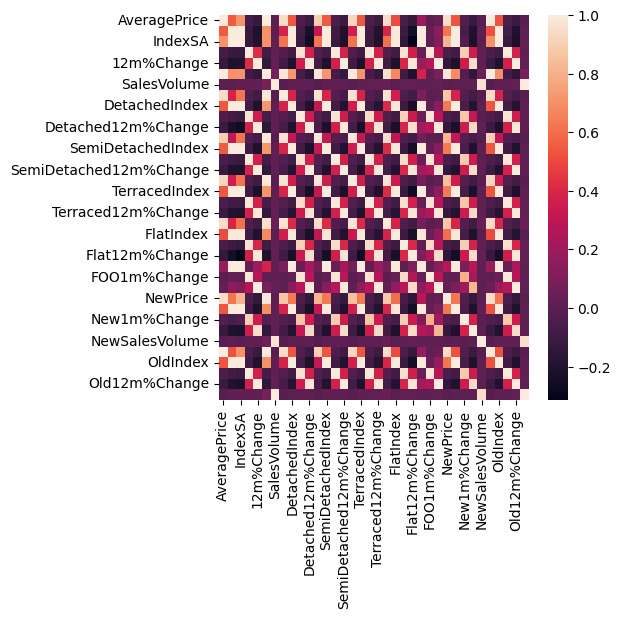

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df[numeric_cols].corr());

In [13]:
# Check duplicate
df.duplicated().sum()

0

In [14]:
#Remove duplicate
df=df.drop_duplicates()


In [15]:
#Check nulls
#Null --> nothing/missin
#NaN --> not a number

df.isnull().sum()

,0
Date,0
RegionName,0
AreaCode,0
AveragePrice,0
Index,0
IndexSA,134871
1m%Change,424
12m%Change,4812
AveragePriceSA,134871
SalesVolume,4467


In [16]:
df.isnull().sum().sum()

738802

In [17]:
#reove Null coluns --> not recomend
df1=df.dropna()
df1.isnull().sum().sum()

0

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 37958 to 139767
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1834 non-null   object 
 1   RegionName              1834 non-null   object 
 2   AreaCode                1834 non-null   object 
 3   AveragePrice            1834 non-null   float64
 4   Index                   1834 non-null   float64
 5   IndexSA                 1834 non-null   float64
 6   1m%Change               1834 non-null   float64
 7   12m%Change              1834 non-null   float64
 8   AveragePriceSA          1834 non-null   float64
 9   SalesVolume             1834 non-null   float64
 10  DetachedPrice           1834 non-null   float64
 11  DetachedIndex           1834 non-null   float64
 12  Detached1m%Change       1834 non-null   float64
 13  Detached12m%Change      1834 non-null   float64
 14  SemiDetachedPrice       1834 non-null  

In [19]:
# Impute nulls, numeric --> mean or median
df4=df.fillna(0)

df5=df[numeric_cols].fillna(df[numeric_cols].mean())

print(df5.isnull().sum().sum())

df6=df[cat_cols].fillna(df[cat_cols].mode)

print(df6.isnull().sum().sum())

df7=df[numeric_cols].fillna(df[numeric_cols].median())

print(df7.isnull().sum().sum())

# knn

#from sklearn.impute import KNNImputer
#knnf=KNNImputer(n_neighbors=1)
#df8=knnf.fit_transform(df[numeric_cols])

# knn for cateorical data
from sklearn.impute import SimpleImputer
imp_frq = SimpleImputer( strategy='most_frequent')
df9=imp_frq.fit_transform(df)

df9=pd.DataFrame(df9)

df9.isnull().sum().sum()

0
0
0


0

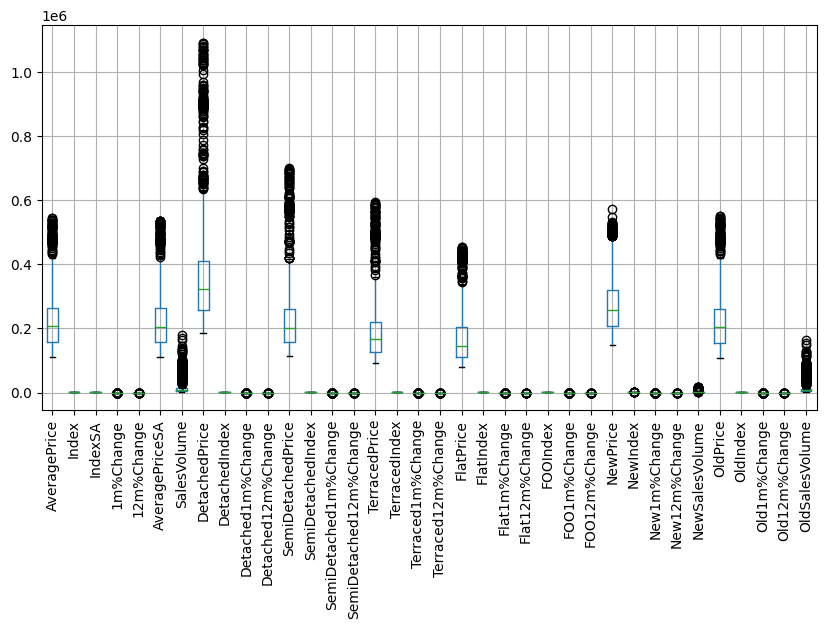

In [40]:
#Boxplot
plt.figure(figsize=(10,5))
df1[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

In [41]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(df)

Percentage of outliers in AveragePrice: 4.68%
Percentage of outliers in Index: 0.02%
Percentage of outliers in IndexSA: 0.00%
Percentage of outliers in 1m%Change: 4.63%
Percentage of outliers in 12m%Change: 5.78%
Percentage of outliers in AveragePriceSA: 0.12%
Percentage of outliers in SalesVolume: 12.64%
Percentage of outliers in DetachedPrice: 6.55%
Percentage of outliers in DetachedIndex: 0.01%
Percentage of outliers in Detached1m%Change: 3.25%
Percentage of outliers in Detached12m%Change: 4.61%
Percentage of outliers in SemiDetachedPrice: 6.39%
Percentage of outliers in SemiDetachedIndex: 0.01%
Percentage of outliers in SemiDetached1m%Change: 3.51%
Percentage of outliers in SemiDetached12m%Change: 5.46%
Percentage of outliers in TerracedPrice: 5.86%
Percentage of outliers in TerracedIndex: 0.01%
Percentage of outliers in Terraced1m%Change: 3.25%
Percentage of outliers in Terraced12m%Change: 5.20%
Percentage of outliers in FlatPrice: 5.19%
Percentage of outliers in FlatIndex: 0.01%


In [42]:
def handle_outliers(df):
    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply to both training and test datasets
df = handle_outliers(df)

In [43]:
calculate_outliers_percentage(df)

Percentage of outliers in AveragePrice: 0.00%
Percentage of outliers in Index: 0.00%
Percentage of outliers in IndexSA: 0.00%
Percentage of outliers in 1m%Change: 0.00%
Percentage of outliers in 12m%Change: 0.00%
Percentage of outliers in AveragePriceSA: 0.00%
Percentage of outliers in SalesVolume: 0.00%
Percentage of outliers in DetachedPrice: 0.00%
Percentage of outliers in DetachedIndex: 0.00%
Percentage of outliers in Detached1m%Change: 0.00%
Percentage of outliers in Detached12m%Change: 0.00%
Percentage of outliers in SemiDetachedPrice: 0.00%
Percentage of outliers in SemiDetachedIndex: 0.00%
Percentage of outliers in SemiDetached1m%Change: 0.00%
Percentage of outliers in SemiDetached12m%Change: 0.00%
Percentage of outliers in TerracedPrice: 0.00%
Percentage of outliers in TerracedIndex: 0.00%
Percentage of outliers in Terraced1m%Change: 0.00%
Percentage of outliers in Terraced12m%Change: 0.00%
Percentage of outliers in FlatPrice: 0.00%
Percentage of outliers in FlatIndex: 0.00%
P

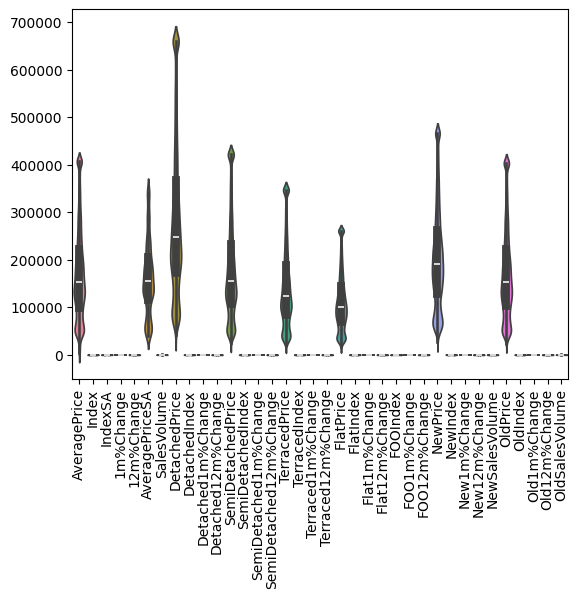

In [44]:
sns.violinplot(df)
plt.xticks(rotation=90)
plt.show()

In [20]:
#Skewness analyis
#sns.displot(df9)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 37958 to 139767
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1834 non-null   object 
 1   RegionName              1834 non-null   object 
 2   AreaCode                1834 non-null   object 
 3   AveragePrice            1834 non-null   float64
 4   Index                   1834 non-null   float64
 5   IndexSA                 1834 non-null   float64
 6   1m%Change               1834 non-null   float64
 7   12m%Change              1834 non-null   float64
 8   AveragePriceSA          1834 non-null   float64
 9   SalesVolume             1834 non-null   float64
 10  DetachedPrice           1834 non-null   float64
 11  DetachedIndex           1834 non-null   float64
 12  Detached1m%Change       1834 non-null   float64
 13  Detached12m%Change      1834 non-null   float64
 14  SemiDetachedPrice       1834 non-null  

<ipython-input-36-279a2ccc1827>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[numeric_cols]);


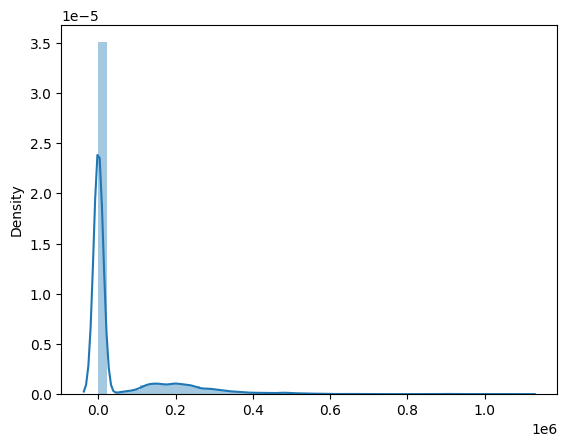

In [36]:
sns.distplot(df1[numeric_cols]);